In [1]:
# Gerekli olan kütüpanelerin import edilmesi.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
# Bazı algoritmaları çalıştırırken hata olarak görünüyor fakat çalışıyor bu sorunun önüne geçemk için aşağıdaki işlemi gerçekleştiriyorum.

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Veri setinin okunmasını sağlıyorum.
df = pd.read_csv(r"C:\Users\realb\Desktop\ML_dersler\ML_301\CART Model\Hitters.csv")

# Veri setinin içinden eksik gözlemleri çıkarmak gerekiyor bu işlemi yapıyorum.
df = df.dropna()

# Şimdi ise dummies ile kukla veri işlemi yapıyorum. One end coding yöntemi ile bu işlemi yapıyorum.
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])

# Bağımlı değişkenimi "y" atıyorum.
y = df["Salary"]

# Veri setimiz içindeki bağımlı değişkeni ve katogorik değişkenlerin götürülmesi işlemini yapıyorum.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Sonuçunda yukardaki değerlerin dummi versyonlarını ve bağımsız değişkenlerimi bir arada tutma işlemini yapıyorum.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Şimdi ise veri setimizde train ve test ayrımı yapmak için bu ayrımı yapma işlemini yapıyorum.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Ben elimde olan veri seti üzerinde ağaca dayalı işlem yapmak için benim adıma kullanmaya değecek olan veri seti gurubu üzerinden ilgili alanı seçip işlem yapıyorum.
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [28]:
# Ağaça dayalı bu işlemi yapmak için model kurulumunu yapıp import etiğim fonksyon üzerinden çalışıyorum.
# Model içine ise maksimum dallanma sayısını veriyorum.
cart_model = DecisionTreeRegressor(max_leaf_nodes=4)

In [29]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=4)

In [30]:
help(cart_model)

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's impro

Text(0, 0.5, 'Maaş')

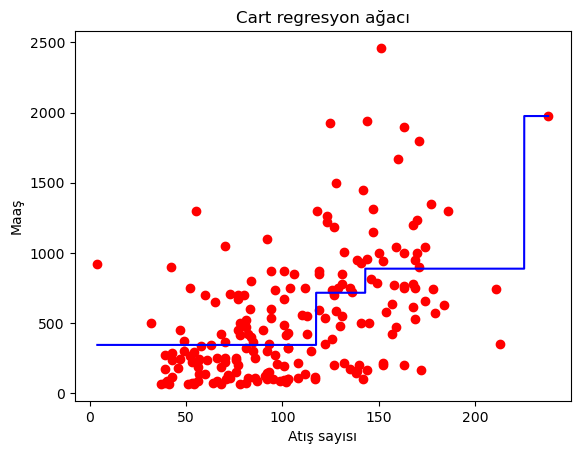

In [31]:
# Şimdi ağaca dayalı modeli eksenler üzerinde nasıl görselleştireceğim bunu yapıyorum.
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')

plt.title('Cart regresyon ağacı')
plt.xlabel('Atış sayısı')
plt.ylabel('Maaş')

"""
Bakın şimdi bu veri grubu özelinde ve bu model üzerinde şimdi bu görselleşöiş veri üzerinden konuşursak sonuç şu sekilde olur.
Diyelim atış sayısı 120 civarlarında mmaş arttı ve bu birde 150 civarlarında arttı aynı sekilde birde 250 civari bu maşşın artması
gerekiyordu bunun regresyon üzerinden işlem yaparak modelin krulumunu yapıp bu şekilde bir sonuç tahmin ettik.
Bu işlemi yaparken genel olarak ortalma alrak bu işlemi gerçekleştirmekte.
"""

In [32]:
# Modelime tahmin ettirme işlemi yuapıyorum.
cart_model.predict(X_test)[0:5]

array([716.62105714, 888.13704444, 716.62105714, 345.20115517,
       345.20115517])

In [33]:
# Modelin hata kareler ortalamasını almak istiyorum.
# Bu hata işlemini tek değişkenli değe üzerinden hesaplanmasını yaparak yapıyorum.
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

456.2452442784017

In [34]:
# Tüm değişkenler üzerinden işlem yapıyorum.

# Veri setinin okunmasını sağlıyorum.
df = pd.read_csv(r"C:\Users\realb\Desktop\ML_dersler\ML_301\CART Model\Hitters.csv")

# Veri setinin içinden eksik gözlemleri çıkarmak gerekiyor bu işlemi yapıyorum.
df = df.dropna()

# Şimdi ise dummies ile kukla veri işlemi yapıyorum. One end coding yöntemi ile bu işlemi yapıyorum.
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])

# Bağımlı değişkenimi "y" atıyorum.
y = df["Salary"]

# Veri setimiz içindeki bağımlı değişkeni ve katogorik değişkenlerin götürülmesi işlemini yapıyorum.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Sonuçunda yukardaki değerlerin dummi versyonlarını ve bağımsız değişkenlerimi bir arada tutma işlemini yapıyorum.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Şimdi ise veri setimizde train ve test ayrımı yapmak için bu ayrımı yapma işlemini yapıyorum.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
cart_model_1 = DecisionTreeRegressor().fit(X_train, y_train)

In [37]:
# tek değişkenli çalışmada açıklanabilirlik değeri daha yüksek olurken, Çok değişkenli çalışmalarda ise başarı yüzdesi artabilir.
y_pred = cart_model_1.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

476.6078684133161

Model tunnig

cart_model

In [40]:
# Mesela burda ben ağaça dayalı modelin kaç adet dalanma derinliğine girçeği hiper paremetreyi giriyorum.
cart_model = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

481.0232333798361

In [41]:
# Bu hiper partemetreler ağaca dayalı modllerde önemlidir ağacın yapısını tanımlamada önemli rol oynamöaktadır.
# BUrları altaki kod alanını çalıştırıp inceleyebilirsin.

?cart_model

In [ ]:
# ağacın fazla dalnaması önüne geçmek için işlemler yapıyıyor ve buna budama deniyor.
# Genelenebilirlik değeri üzerinden başarı sağlamaya çalışıyor.
# Ve ihtiyaç dışı olan dalları çıkarak ağacın yapısını daha başarılı bir hale gelmesini sağlıyor.

In [45]:
cart_params = {"max_depth": [2,3,4,5,6,10,20],
              "min_samples_split": [2,3,4,5,8,10,20,50]}
# Bu yukardaki iki değeri ağaça dayalı modeli daha başarılı olması için bu hiper paremetre değerlerini ona verdiğim değerler üzerinden denemesini istiyorum.

cart_model_2 = DecisionTreeRegressor()

In [46]:
# Yukardan gelen hiper paremetre değerleri üzerinden model kurulmasın işlemi yapıyorum.
cart_cv_model = GridSearchCV(cart_model_2, cart_params, cv = 10).fit(X_train, y_train)

In [47]:
# Yukarda kurulan model üzerinden en iyi paremetrelerin belirlenmesi işlemini yapıyorum.
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

Final model

In [49]:
# En başarılı hiperparemetre değerleri üzerinden yeniden model kurulma işlemini gerçekleştiriyorum.
cart_model_3 = DecisionTreeRegressor(max_depth=5, min_samples_split=50).fit(X_train, y_train)

In [50]:
# Final modeli üzerinden test hatamızı gözlemleyelim.
y_pred = cart_model_3.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
"""
Üste bakarsanız hata oranı 481 den 361 değere düşüyor bunu daha ayar yaparak yapıyoruz.
Makine öğrenme modellerinde model kurulabilir ama örnek üzerinde gördüğünüz gibi bu ayarlar çok şeyi değiştirmektedir.
Bu işlemler modeli daha iyi çalışmasını ve aslında herkes model kurmaya başladığında hangi modelin daha başarılı olduğu noktada size yardımcı olacaktır.
"""

361.0876906511434